## Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings. filterwarnings('ignore')

In [2]:
# loading data
df_train=pd.read_excel("C:\\Users\\Admin\\Downloads\\Datatrained\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx")
df_test=pd.read_excel("C:\\Users\\Admin\\Downloads\\Datatrained\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx")

In [3]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- 10 categorical and 1 numerical columns are present in data
- Target ( Price ) columns are numerical 

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- There are columns having null 1-1 null values
- Should drop null values

In [7]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

- there is no null values in test data

In [8]:
# dropping null values
df_train.dropna(inplace=True)

In [9]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# printing all data type and their unique values
for column in df_train.columns:
    if df_train[column].dtype==object:
        print(str(column)+' : ' + str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print('============================================')

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Date_of_Journey : ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/

In [11]:
# dividing Date_of_Journey into three other columns 
df_train['Journey_Date']=df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Journey_Month']=df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Journey_Year']=df_train['Date_of_Journey'].str.split('/').str[2]

# dropping Date_of_Journey column
df_train.drop('Date_of_Journey',axis=1,inplace=True)


# dividing Date_of_Journey into three other columns 
df_test['Journey_Date']=df_test['Date_of_Journey'].str.split('/').str[0]
df_test['Journey_Month']=df_test['Date_of_Journey'].str.split('/').str[1]
df_test['Journey_Year']=df_test['Date_of_Journey'].str.split('/').str[2]

# dropping Date_of_Journey column
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
# coverting duration Hours Into minutes
df_train['Duration']=df_train['Duration'].str.replace("h", '*60') .str.replace(' ','+').str.replace('m','*1').apply(eval)
df_test['Duration']=df_test['Duration'].str.replace("h", '*60') .str.replace(' ','+').str.replace('m','*1').apply(eval)



In [13]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,01,03,2019


In [14]:
df_train['Journey_Year'].value_counts()

2019    10682
Name: Journey_Year, dtype: int64

- All the data belongs to the same year so dropping the year column

In [15]:
# droping year column
df_train.drop('Journey_Year',axis=1,inplace=True)
df_test.drop('Journey_Year',axis=1,inplace=True)


In [16]:
df_train['Journey_Month'].value_counts()

05    3465
06    3414
03    2724
04    1079
Name: Journey_Month, dtype: int64

In [17]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,01,03


In [18]:
# removing date from Arrival_Time column
df_train['Arrival_Time']=df_train['Arrival_Time'].str.split(' ').str[0]
df_test['Arrival_Time']=df_test['Arrival_Time'].str.split(' ').str[0]


In [19]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,01,03


In [20]:
# replacing non-stop to 0 stop in Tatol_Stops columns
df_train['Total_Stops']=df_train['Total_Stops'].replace('non-stop','0 stop')
df_test['Total_Stops']=df_test['Total_Stops'].replace('non-stop','0 stop')

In [21]:
# Creating new columns from Total_Stops into Stop and keeping number only
df_train['Stop'] = df_train['Total_Stops'].str.split(' ').str[0]
df_test['Stop'] = df_test['Total_Stops'].str.split(' ').str[0]

In [22]:
df_train['Stop']=df_train['Stop'].astype(int)
df_test['Stop']=df_test['Stop'].astype(int)

# dropping Total_Stops coulumn
df_train=df_train.drop(['Total_Stops'],axis=1)
df_test=df_test.drop(['Total_Stops'],axis=1)

In [23]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Journey_Date,Journey_Month,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,No info,3897,24,03,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,No info,7662,1,05,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,No info,13882,9,06,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,No info,6218,12,05,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,No info,13302,01,03,1


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  int64 
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Date     10682 non-null  object
 10  Journey_Month    10682 non-null  object
 11  Stop             10682 non-null  int32 
dtypes: int32(1), int64(2), object(9)
memory usage: 1.0+ MB


In [25]:
# splitting Arrival_Time into two new columns Arrival_Hour and Minutes
df_train['Arrival_Hour'] = df_train['Arrival_Time'] .str.split(':').str[0]
df_train['Arrival_Minute'] = df_train['Arrival_Time'] .str.split(':').str[1]



df_test['Arrival_Hour'] = df_test['Arrival_Time'] .str.split(':').str[0]
df_test['Arrival_Minute'] = df_test['Arrival_Time'] .str.split(':').str[1]

In [26]:
df_train['Arrival_Hour']=df_train['Arrival_Hour'].astype(int)
df_train['Arrival_Minute']=df_train['Arrival_Minute'].astype(int)
df_train=df_train.drop(['Arrival_Time'],axis=1)


df_test['Arrival_Hour']=df_test['Arrival_Hour'].astype(int)
df_test['Arrival_Minute']=df_test['Arrival_Minute'].astype(int)
df_test=df_test.drop(['Arrival_Time'],axis=1)

In [27]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Journey_Date,Journey_Month,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,170,No info,3897,24,03,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,445,No info,7662,1,05,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,1140,No info,13882,9,06,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,325,No info,6218,12,05,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,285,No info,13302,01,03,1,21,35


In [28]:
df_train['Departure_Hour'] = df_train['Dep_Time'] .str.split(':').str[0]
df_train['Departure_Minute'] = df_train['Dep_Time'] .str.split(':').str[1]


df_test['Departure_Hour'] = df_test['Dep_Time'] .str.split(':').str[0]
df_test['Departure_Minute'] = df_test['Dep_Time'] .str.split(':').str[1]

In [29]:
df_train['Departure_Hour']=df_train['Departure_Hour'].astype(int)
df_train['Departure_Minute']=df_train['Departure_Minute'].astype(int)
df_train=df_train.drop(['Dep_Time'],axis=1)



df_test['Departure_Hour']=df_test['Departure_Hour'].astype(int)
df_test['Departure_Minute']=df_test['Departure_Minute'].astype(int)
df_test=df_test.drop(['Dep_Time'],axis=1)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10682 non-null  int64 
 5   Additional_Info   10682 non-null  object
 6   Price             10682 non-null  int64 
 7   Journey_Date      10682 non-null  object
 8   Journey_Month     10682 non-null  object
 9   Stop              10682 non-null  int32 
 10  Arrival_Hour      10682 non-null  int32 
 11  Arrival_Minute    10682 non-null  int32 
 12  Departure_Hour    10682 non-null  int32 
 13  Departure_Minute  10682 non-null  int32 
dtypes: int32(5), int64(2), object(7)
memory usage: 1.0+ MB


In [31]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Journey_Date,Journey_Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,No info,3897,24,03,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,No info,7662,1,05,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,No info,13882,9,06,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,No info,6218,12,05,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,No info,13302,01,03,1,21,35,16,50


In [32]:
df_train['Route_1']=df_train['Route'].str.split('→ ').str[0]
df_train['Route_2']=df_train['Route'].str.split('→ ').str[1]
df_train['Route_3']=df_train['Route'].str.split('→ ').str[2]
df_train['Route_4']=df_train['Route'].str.split('→ ').str[3]
df_train['Route_5']=df_train['Route'].str.split('→ ').str[4]


df_test['Route_1']=df_test['Route'].str.split('→ ').str[0]
df_test['Route_2']=df_test['Route'].str.split('→ ').str[1]
df_test['Route_3']=df_test['Route'].str.split('→ ').str[2]
df_test['Route_4']=df_test['Route'].str.split('→ ').str[3]
df_test['Route_5']=df_test['Route'].str.split('→ ').str[4]

In [33]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Journey_Date,Journey_Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,No info,3897,24,03,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,No info,7662,1,05,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,No info,13882,9,06,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,No info,6218,12,05,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,No info,13302,01,03,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [34]:
df_train.isnull().sum()

Airline                 0
Source                  0
Destination             0
Route                   0
Duration                0
Additional_Info         0
Price                   0
Journey_Date            0
Journey_Month           0
Stop                    0
Arrival_Hour            0
Arrival_Minute          0
Departure_Hour          0
Departure_Minute        0
Route_1                 0
Route_2                 0
Route_3              3491
Route_4              9116
Route_5             10636
dtype: int64

In [35]:
df_train.fillna('None',inplace=True)

df_test.fillna('None',inplace=True)

In [36]:
df_train=df_train.drop(['Route'],axis=1)

df_test=df_test.drop(['Route'],axis=1)

In [37]:
df_train.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Additional_Info     0
Price               0
Journey_Date        0
Journey_Month       0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [38]:
df_train.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Date,Journey_Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,170,No info,3897,24,03,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,445,No info,7662,1,05,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,1140,No info,13882,9,06,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,325,No info,6218,12,05,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,285,No info,13302,01,03,1,21,35,16,50,BLR,NAG,DEL,None,None


In [39]:
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [40]:
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})


df_test["Additional_Info"] = df_test["Additional_Info"].replace({'No Info': 'No info'})

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Duration          10682 non-null  int64 
 4   Additional_Info   10682 non-null  object
 5   Price             10682 non-null  int64 
 6   Journey_Date      10682 non-null  object
 7   Journey_Month     10682 non-null  object
 8   Stop              10682 non-null  int32 
 9   Arrival_Hour      10682 non-null  int32 
 10  Arrival_Minute    10682 non-null  int32 
 11  Departure_Hour    10682 non-null  int32 
 12  Departure_Minute  10682 non-null  int32 
 13  Route_1           10682 non-null  object
 14  Route_2           10682 non-null  object
 15  Route_3           10682 non-null  object
 16  Route_4           10682 non-null  object
 17  Route_5     

# EDA

In [42]:
df_train.corr()

,Duration,Price,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
Duration,1.000000,0.506480,0.738071,0.051531,-0.069663,0.002088,-0.019099
Price,0.506480,1.000000,0.603897,0.024244,-0.086155,0.006799,-0.024458
Stop,0.738071,0.603897,1.000000,0.038140,-0.106940,-0.061476,-0.002618
Arrival_Hour,0.051531,0.024244,0.038140,1.000000,-0.154363,0.005180,0.043122
Arrival_Minute,-0.069663,-0.086155,-0.106940,-0.154363,1.000000,0.067911,-0.017597
Departure_Hour,0.002088,0.006799,-0.061476,0.005180,0.067911,1.000000,-0.024745
Departure_Minute,-0.019099,-0.024458,-0.002618,0.043122,-0.017597,-0.024745,1.000000


<AxesSubplot:>

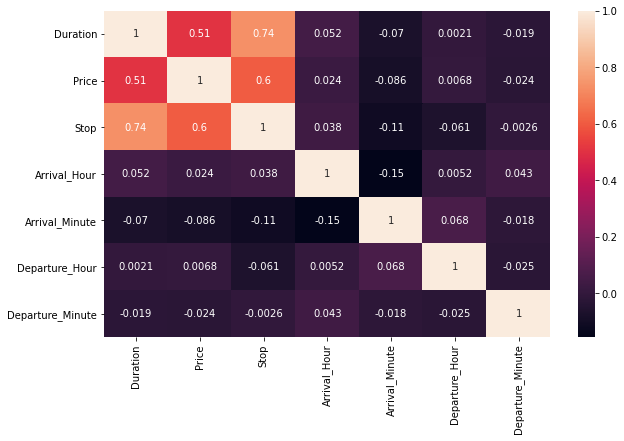

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),annot=True)

- We can notice Stop having possotive correlation with price means there is high impact on price of Stop
- Duration also having positve correlation with price
- Stop and Duration having high correlation with each other
- All other features are very less correlation with price

In [44]:
df_train.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Date,Journey_Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,170,No info,3897,24,03,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,445,No info,7662,1,05,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,1140,No info,13882,9,06,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,325,No info,6218,12,05,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,285,No info,13302,01,03,1,21,35,16,50,BLR,NAG,DEL,None,None


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

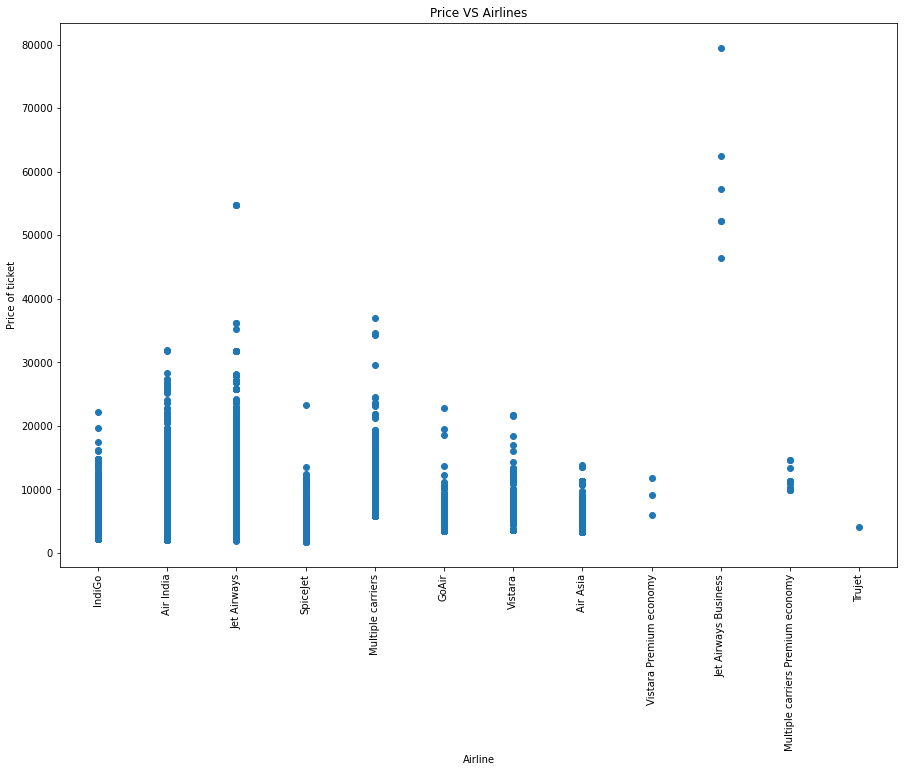

In [45]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df_train['Airline'], df_train['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

- Jet Airways have most expensive ticket price
- After that Jet Airways, Air India and  Multiple carriers having high prices
- Trujet does not have much flights

Text(0, 0.5, 'Price of flights')

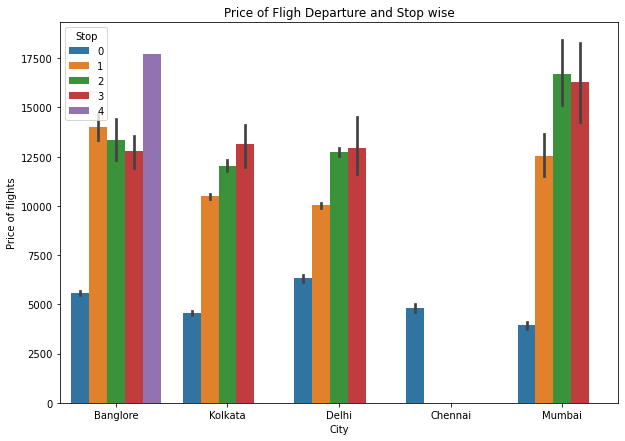

In [46]:
plt.figure(figsize = (10, 7))
plt.title('Price of Fligh Departure and Stop wise')
ax=sns.barplot(x = 'Source',y='Price',hue='Stop', data = df_train)
plt.xlabel('City')
plt.ylabel('Price of flights')

Text(0, 0.5, 'Count of flights')

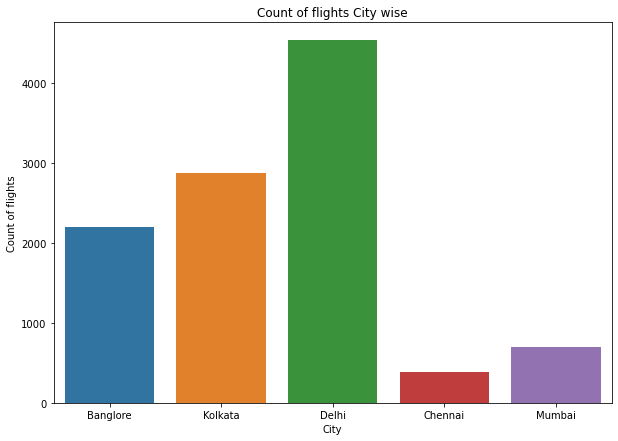

In [47]:
plt.figure(figsize = (10, 7))
plt.title('Count of flights City wise')
ax=sns.countplot(x = 'Source', data = df_train)
plt.xlabel('City')
plt.ylabel('Count of flights')

- Most of the flight flew from Delhi 
- After that most flight are departuring from Kolkata and Banglore
- Chennai and Mumbai having very less departures

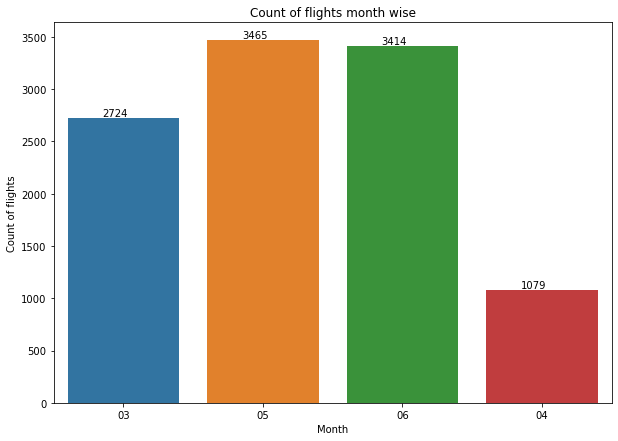

In [48]:
plt.figure(figsize = (10, 7))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_Month', data = df_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

- We can see most of the flight travelling is done in month 5(may) and 6(June)
- In month 3 (March) also around 2724 flights flew.
- In month 4(April) very less travelling happened.

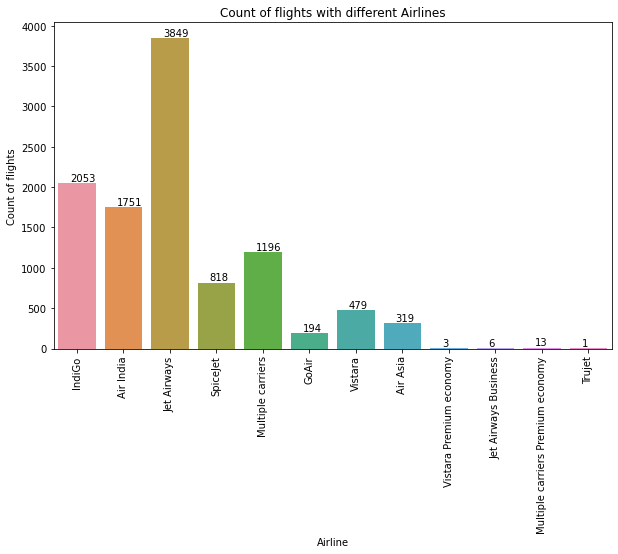

In [49]:
plt.figure(figsize = (10,6))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

- Herewe see count of every flight in each Airline
 - Jet Airways has most of flights travelled around 3849
 - IndiGo also having more 2000 and Air India having 1751 flights travelled
 - SpiceJat having 818 and Multiple carriers having 1196 flights travelled
 - GoAir, Vistara and Air Asia are having low numbers of flights travelled less than 500 
 - All other Airlines are very less travelled.

# Not Dealing with skewness and Outliers because all features were the categorical features

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Duration          10682 non-null  int64 
 4   Additional_Info   10682 non-null  object
 5   Price             10682 non-null  int64 
 6   Journey_Date      10682 non-null  object
 7   Journey_Month     10682 non-null  object
 8   Stop              10682 non-null  int32 
 9   Arrival_Hour      10682 non-null  int32 
 10  Arrival_Minute    10682 non-null  int32 
 11  Departure_Hour    10682 non-null  int32 
 12  Departure_Minute  10682 non-null  int32 
 13  Route_1           10682 non-null  object
 14  Route_2           10682 non-null  object
 15  Route_3           10682 non-null  object
 16  Route_4           10682 non-null  object
 17  Route_5     

In [51]:
#Encoding object columns into Numeric Values in df_train
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_categorical_data = df_train.select_dtypes(exclude=['int64', 'float','int32'])
for val in train_categorical_data:
    df_train[val]=le.fit_transform(df_train[val].astype(str))

In [52]:
#Encoding object columns into Numeric Values in df_test
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_categorical_data = df_test.select_dtypes(exclude=['int64', 'float','int32'])
for val in train_categorical_data:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10682 non-null  int32
 1   Source            10682 non-null  int32
 2   Destination       10682 non-null  int32
 3   Duration          10682 non-null  int64
 4   Additional_Info   10682 non-null  int32
 5   Price             10682 non-null  int64
 6   Journey_Date      10682 non-null  int32
 7   Journey_Month     10682 non-null  int32
 8   Stop              10682 non-null  int32
 9   Arrival_Hour      10682 non-null  int32
 10  Arrival_Minute    10682 non-null  int32
 11  Departure_Hour    10682 non-null  int32
 12  Departure_Minute  10682 non-null  int32
 13  Route_1           10682 non-null  int32
 14  Route_2           10682 non-null  int32
 15  Route_3           10682 non-null  int32
 16  Route_4           10682 non-null  int32
 17  Route_5           10682 non-nul

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           2671 non-null   int32
 1   Source            2671 non-null   int32
 2   Destination       2671 non-null   int32
 3   Duration          2671 non-null   int64
 4   Additional_Info   2671 non-null   int32
 5   Journey_Date      2671 non-null   int32
 6   Journey_Month     2671 non-null   int32
 7   Stop              2671 non-null   int32
 8   Arrival_Hour      2671 non-null   int32
 9   Arrival_Minute    2671 non-null   int32
 10  Departure_Hour    2671 non-null   int32
 11  Departure_Minute  2671 non-null   int32
 12  Route_1           2671 non-null   int32
 13  Route_2           2671 non-null   int32
 14  Route_3           2671 non-null   int32
 15  Route_4           2671 non-null   int32
 16  Route_5           2671 non-null   int32
dtypes: int32(16), int64(1)
memory usa

In [55]:
df_train.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Date,Journey_Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,170,7,3897,9,0,0,1,10,22,20,0,13,24,12,4
1,1,3,0,445,7,7662,4,2,2,13,15,5,50,2,25,1,3,4
2,4,2,1,1140,7,13882,13,3,2,4,25,9,25,3,32,4,5,4
3,3,3,0,325,7,6218,5,2,1,23,30,18,5,2,34,3,12,4
4,3,0,5,285,7,13302,0,0,1,21,35,16,50,0,34,8,12,4


In [56]:
df_test.head()

,Airline,Source,Destination,Duration,Additional_Info,Journey_Date,Journey_Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,655,5,12,3,1,4,25,17,30,3,7,5,8,3
1,3,3,0,240,5,5,2,1,10,20,6,20,2,29,3,8,3
2,4,2,1,1425,3,8,2,1,19,0,19,15,3,7,5,8,3
3,6,2,1,780,5,8,2,1,21,0,8,0,3,7,5,8,3
4,0,0,2,170,5,9,3,0,2,45,23,55,0,13,21,8,3


# Dividing data into X and Y

In [57]:
x=df_train.drop(['Price'],axis=1)
y=df_train['Price']


In [58]:
print(x.shape)
print(y.shape)

(10682, 17)
(10682,)


#### SCALLING THE DATA

In [59]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [60]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.360564,0.488064,0.287231,0.223475,0.822763,0.647898,0.569525,0.206048,0.580399,0.448920,0.543088,0.443805,0.504845,0.270408,0.400038,0.841466,0.797491
std,0.213826,0.294319,0.294969,0.177874,0.104763,0.247636,0.388136,0.168807,0.298231,0.300124,0.249949,0.341233,0.301560,0.181964,0.311880,0.199939,0.040144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.500000,0.000000,0.057793,0.875000,0.461538,0.000000,0.000000,0.347826,0.181818,0.347826,0.090909,0.250000,0.159091,0.137931,0.923077,0.800000
50%,0.363636,0.500000,0.200000,0.180385,0.875000,0.692308,0.666667,0.250000,0.608696,0.454545,0.478261,0.454545,0.500000,0.181818,0.206897,0.923077,0.800000
75%,0.363636,0.750000,0.400000,0.323993,0.875000,0.846154,1.000000,0.250000,0.826087,0.636364,0.782609,0.727273,0.750000,0.318182,0.827586,0.923077,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
x.shape

(10682, 17)

 # MODEL BUILDING:

### Linear Regression

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



#### CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [63]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.48300463901400925
At random state 0, The test accuracy is: 0.4620069017363846


At random state 1, The training accuracy is: 0.4739929341386442
At random state 1, The test accuracy is: 0.49817864071002327


At random state 2, The training accuracy is: 0.4820553471110335
At random state 2, The test accuracy is: 0.4632866054478417


At random state 3, The training accuracy is: 0.47177206864469523
At random state 3, The test accuracy is: 0.5087185294634105


At random state 4, The training accuracy is: 0.483714763021202
At random state 4, The test accuracy is: 0.45919150915661544


At random state 5, The training accuracy is: 0.4787579302647297
At random state 5, The test accuracy is: 0.47769489400538767


At random state 6, The training accuracy is: 0.4827568149116972
At random state 6, The test accuracy is: 0.462135328980666


At random state 7, The training accuracy is: 0.4718676746394177
At random state 7, The test accuracy is: 0.50675819

At random state 66, The training accuracy is: 0.4873779137185428
At random state 66, The test accuracy is: 0.44625800852276587


At random state 67, The training accuracy is: 0.47637881300235796
At random state 67, The test accuracy is: 0.48801880143537013


At random state 68, The training accuracy is: 0.47292952438745994
At random state 68, The test accuracy is: 0.5016588806848699


At random state 69, The training accuracy is: 0.47137788742425346
At random state 69, The test accuracy is: 0.5102106059548017


At random state 70, The training accuracy is: 0.4952584851753149
At random state 70, The test accuracy is: 0.4102158151678228


At random state 71, The training accuracy is: 0.477705309087068
At random state 71, The test accuracy is: 0.4817034009905642


At random state 72, The training accuracy is: 0.47220571709177983
At random state 72, The test accuracy is: 0.5059103520087884


At random state 73, The training accuracy is: 0.47932013185401523
At random state 73, The test accu

At random state 133, The training accuracy is: 0.4716872653364843
At random state 133, The test accuracy is: 0.5100541079175192


At random state 134, The training accuracy is: 0.4844441091762802
At random state 134, The test accuracy is: 0.45639270312923763


At random state 135, The training accuracy is: 0.47465625685232227
At random state 135, The test accuracy is: 0.49558532670709343


At random state 136, The training accuracy is: 0.4673466782592456
At random state 136, The test accuracy is: 0.5277186151789528


At random state 137, The training accuracy is: 0.47480395617891225
At random state 137, The test accuracy is: 0.4942624407462747


At random state 138, The training accuracy is: 0.4836618395708936
At random state 138, The test accuracy is: 0.4604613367000714


At random state 139, The training accuracy is: 0.47679104473693434
At random state 139, The test accuracy is: 0.48453718311061333


At random state 140, The training accuracy is: 0.4744694576573666
At random state 14

At random state 205, The training accuracy is: 0.48305712960803193
At random state 205, The test accuracy is: 0.4614365336741697


At random state 206, The training accuracy is: 0.48182290183166643
At random state 206, The test accuracy is: 0.4639255776268322


At random state 207, The training accuracy is: 0.47537397015878446
At random state 207, The test accuracy is: 0.49268560760230684


At random state 208, The training accuracy is: 0.4716542693756466
At random state 208, The test accuracy is: 0.5068979533157748


At random state 209, The training accuracy is: 0.47771670748269457
At random state 209, The test accuracy is: 0.48165244841821475


At random state 210, The training accuracy is: 0.472364894425103
At random state 210, The test accuracy is: 0.5047504595343435


At random state 211, The training accuracy is: 0.4736960578674144
At random state 211, The test accuracy is: 0.500192766416728


At random state 212, The training accuracy is: 0.49160784790495615
At random state 212

At random state 278, The training accuracy is: 0.47681851030892786
At random state 278, The test accuracy is: 0.4848499797968264


At random state 279, The training accuracy is: 0.47777383772831694
At random state 279, The test accuracy is: 0.48182735159164936


At random state 280, The training accuracy is: 0.4735271786689982
At random state 280, The test accuracy is: 0.4983660278647787


At random state 281, The training accuracy is: 0.4764064273601428
At random state 281, The test accuracy is: 0.48813582257957566


At random state 282, The training accuracy is: 0.4773898102193237
At random state 282, The test accuracy is: 0.4837171183925423


At random state 283, The training accuracy is: 0.4841111897913737
At random state 283, The test accuracy is: 0.45630634451738084


At random state 284, The training accuracy is: 0.4838069227908798
At random state 284, The test accuracy is: 0.4589970909796578


At random state 285, The training accuracy is: 0.476668299260525
At random state 285,

random state=46 giving highest accuracy, choosing that as random state

#### SPLITTING THE DATA WITH RANDOM STATE =46

In [64]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=46)

In [65]:
x_train.shape

(7797, 17)

In [66]:
x_test.shape

(2885, 17)

In [67]:
y_train.shape

(7797,)

In [68]:
y_test.shape

(2885,)

## LinearRegression

In [69]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.47687224969619535


In [70]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 10153739.590189787
MAE: 2278.7232339247153
r2_score: -0.017617120297010347


### Ridge

In [71]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.47676388903467026


In [72]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 10151426.478510538
MAE: 2279.3717751734207
r2_score: -0.021469660454483286


### SVR
#### SVR(kernel='linear')

In [73]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.11700127021876516


In [74]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 16849652.52026779
MAE: 3104.563147547779
r2_score: -29.698766753333476


#### SVR(kernel='poly')

In [75]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.39880221331659504


In [76]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 11052562.313305615
MAE: 2255.443993132602
r2_score: -0.7577669943751746


#### (kernel='rbf')

In [77]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.03446703468522094


In [78]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))


MSE: 18684202.675226655
MAE: 3354.582986330064
r2_score: -194.09733989318354


### RandomForestRegressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9786877990236865


In [80]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 3024660.4480417618
MAE: 665.4963628740987
r2_score: 0.834488789059397


### DecisionTreeRegressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9963562893778326


In [82]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 3238361.1233992875
MAE: 699.1430098209128
r2_score: 0.8301008169066685


### GradientBoostingRegressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8402761469432947


In [84]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 4034928.0014025206
MAE: 1238.0822611726348
r2_score: 0.7256361626675178


### cross validation


In [85]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 11141779.614634, 2039644.949791
R    : 11142066.811524, 2042685.811896
svr    : 18027946.304242, 2849087.814298
svr_p    : 12421681.627515, 2476866.209975
svr_r    : 20177378.716306, 2859830.213764
RF    : 2563813.044301, 1006226.719586
DTR    : 3920221.888481, 1457049.102007
GBR    : 3858743.421100, 805151.956319


#### -Accourding to all metrics score selecting the DecisionTreeRegressor for GridSeachCV

## HYPER PARAMETER TUNING:


## GridSearchCV

#### DecisionTreeRegressor

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
dtr=DecisionTreeRegressor()
param={
     'criterion':["mse", "friedman_mse", "mae"],
    'random_state':[46],
    'splitter':['best','random'],
   'max_features' : ['auto',"sqrt", "log2",],
}

In [88]:
dtr_grid=GridSearchCV(DecisionTreeRegressor(),param,scoring='neg_mean_squared_error', cv = 5, verbose=2, n_jobs = 1)

In [89]:
dtr_grid.fit(x_train,y_train)
dtr_grid_pred=dtr_grid.best_estimator_.predict(x_test)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] criterion=mse, max_features=auto, random_state=46, splitter=best 
[CV]  criterion=mse, max_features=auto, random_state=46, splitter=best, total=   0.1s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=best 
[CV]  criterion=mse, max_features=auto, random_state=46, splitter=best, total=   0.1s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=best 
[CV]  criterion=mse, max_features=auto, random_state=46, splitter=best, total=   0.0s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, max_features=auto, random_state=46, splitter=best, total=   0.1s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=best 
[CV]  criterion=mse, max_features=auto, random_state=46, splitter=best, total=   0.1s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=random 
[CV]  criterion=mse, max_features=auto, random_state=46, splitter=random, total=   0.0s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=random 
[CV]  criterion=mse, max_features=auto, random_state=46, splitter=random, total=   0.0s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=random 
[CV]  criterion=mse, max_features=auto, random_state=46, splitter=random, total=   0.0s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=random 
[CV]  criterion=mse, max_features=auto, random_state=46, splitter=random, total=   0.0s
[CV] criterion=mse, max_features=auto, random_state=46, splitter=random 
[CV]  criterion=mse, max_features=auto, 

[CV]  criterion=friedman_mse, max_features=log2, random_state=46, splitter=random, total=   0.0s
[CV] criterion=friedman_mse, max_features=log2, random_state=46, splitter=random 
[CV]  criterion=friedman_mse, max_features=log2, random_state=46, splitter=random, total=   0.0s
[CV] criterion=friedman_mse, max_features=log2, random_state=46, splitter=random 
[CV]  criterion=friedman_mse, max_features=log2, random_state=46, splitter=random, total=   0.0s
[CV] criterion=friedman_mse, max_features=log2, random_state=46, splitter=random 
[CV]  criterion=friedman_mse, max_features=log2, random_state=46, splitter=random, total=   0.0s
[CV] criterion=mae, max_features=auto, random_state=46, splitter=best 
[CV]  criterion=mae, max_features=auto, random_state=46, splitter=best, total=   2.6s
[CV] criterion=mae, max_features=auto, random_state=46, splitter=best 
[CV]  criterion=mae, max_features=auto, random_state=46, splitter=best, total=   2.8s
[CV] criterion=mae, max_features=auto, random_state=

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   35.8s finished


In [90]:
dtr_grid.best_params_

{'criterion': 'mae',
 'max_features': 'auto',
 'random_state': 46,
 'splitter': 'random'}

#### model training with best parameters

In [91]:
best_param={'criterion': ['mae'],
 'max_features': ['auto'],
 'random_state': [46],
 'splitter': ['random']}

In [94]:
best_dtr_grid=GridSearchCV(DecisionTreeRegressor(),best_param,cv=10,scoring='r2',n_jobs=-1,verbose=2)

In [95]:
best_dtr_grid.fit(x_train,y_train)
best_dtr_pred=best_dtr_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.6s finished


In [96]:
print('MSE:',mean_squared_error(best_dtr_pred,y_test))
print('MAE:',mean_absolute_error(best_dtr_pred,y_test))
print('r2_score:',r2_score(best_dtr_pred,y_test))

MSE: 5194385.927469671
MAE: 764.5110918544194
r2_score: 0.7600845414719825


<AxesSubplot:xlabel='Price', ylabel='Density'>

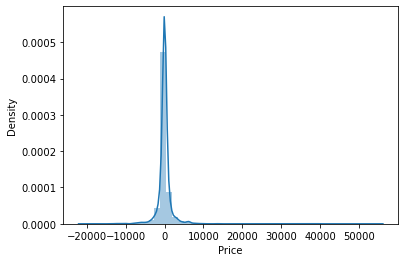

In [97]:
sns.distplot(best_dtr_pred-y_test)

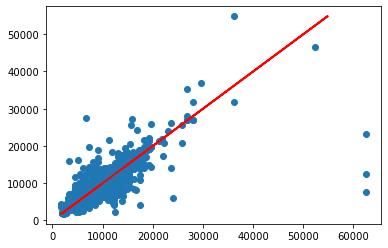

In [98]:
plt.scatter(best_dtr_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

## Saving the model

In [99]:
import joblib

In [100]:
joblib.dump(best_dtr_grid.best_estimator_,'Flight Price Prediction.obj')

['Flight Price Prediction.obj']

In [101]:
model=joblib.load('Flight Price Prediction.obj')

## Predicting df_test data on model

In [102]:
n=model.predict(df_test)
n

array([ 7952.,  7952.,  7952., ..., 16142., 10945.,  7952.])

In [103]:
pd.DataFrame(n).value_counts()

7952.0     901
2227.0     604
7690.0     295
16142.0    257
2017.0     219
5092.0     123
15419.0     64
10945.0     64
14408.0     48
18387.0     27
1759.0      16
15965.0     13
4784.0      10
6197.0       5
6065.0       5
5932.0       5
9417.0       5
7893.0       4
6587.0       3
12009.0      2
62427.0      1
dtype: int64